In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer, LabelBinarizer, Normalizer, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb

In [2]:
df_var = pd.read_csv("data/train.csv", low_memory=False)


In [3]:
row_null = df_var.isnull().sum(axis=1)
row_null_df = pd.DataFrame(df_var["ID"])
row_null_df["行缺失值数量"] = row_null
row_null_df.head()

,ID,行缺失值数量
0,1,2
1,3,158
2,9,159
3,10,158
4,14,3


In [4]:
total_columns = df_var.shape[1]
row_null_df["行缺失值比例"] = round(row_null_df["行缺失值数量"]/total_columns, 2)
row_null_df.head()

,ID,行缺失值数量,行缺失值比例
0,1,2,0.01
1,3,158,0.89
2,9,159,0.89
3,10,158,0.89
4,14,3,0.02


In [5]:
row_null_df_groupby = row_null_df["行缺失值数量"].value_counts()

row_null_df_groupby

data = {
    "行缺失值数量": row_null_df_groupby.index,
    "比例对应的条数": row_null_df_groupby.values
}
row_null_df_groupby = pd.DataFrame(data)
row_null_df_groupby["比例对应的占比"] = round(row_null_df_groupby["比例对应的条数"] / df_var.shape[0], 3)
row_null_df_groupby = row_null_df_groupby.sort_values(by="行缺失值数量" , ascending=False)
row_null_df_groupby

,行缺失值数量,比例对应的条数,比例对应的占比,比例对应的占比2
15,174,44,0.003,0.5
12,173,94,0.007,0.5
11,172,185,0.013,0.5
6,171,439,0.031,0.5
19,163,10,0.001,0.5
13,162,75,0.005,0.5
9,161,310,0.022,0.5
3,160,1456,0.101,0.5
0,159,3831,0.267,0.5
2,158,1501,0.104,0.5


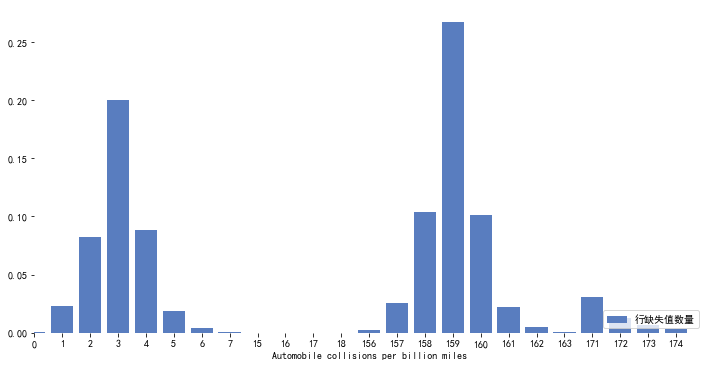

In [17]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="行缺失值数量", y="比例对应的占比", data=row_null_df_groupby,
            label="行缺失值数量", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [7]:
def check_row_nan_count(df_var):
    row_null = df_var.isnull().sum(axis=1)
    row_null_df = pd.DataFrame(df_var["ID"])
    row_null_df["行缺失值数量"] = row_null
    
    total_columns = df_var.shape[1]
    row_null_df["行缺失值比例"] = 0
    rate_list = []
    for index, rn in enumerate(row_null_df["行缺失值数量"]):
        rate_list.append(round(rn/total_columns, 2))
    row_null_df["行缺失值比例"] = rate_list
    return row_null_df

def row_name_count_df(row_null_df):
    row_null_df_groupby = row_null_df.groupby("行缺失值比例")["行缺失值数量"].value_counts()
    row_null_df_groupby = pd.DataFrame(row_null_df_groupby)
    return row_null_df_groupby

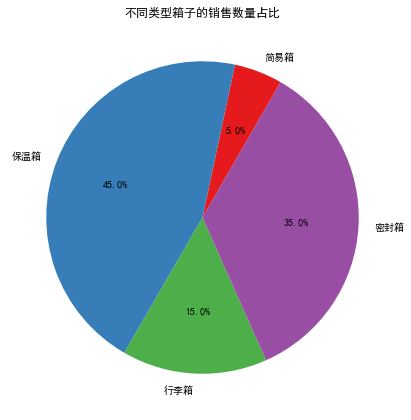

In [22]:
kinds = "简易箱", "保温箱", "行李箱", "密封箱"
soldNums = [0.05, 0.45, 0.15, 0.35]
plt.figure(figsize=(7,8))
plt.pie(soldNums, labels=kinds, autopct="%3.1f%%", startangle=60, colors=colors)
plt.title("不同类型箱子的销售数量占比")
plt.show()